# Plot Debugging

I am noticing some wierd things in the plots, and I am going to attempt to fix them on this branch:
- #41, it seems like the ball and the players are on different time scales?
- #14, the event only shows up for one frame

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import os

# Matt written files
from src.utils import *
from src.plotting import Baseball_Field
from src.game import Game

In [2]:
# pandas options
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'

Example plays are 
- 326
- 18

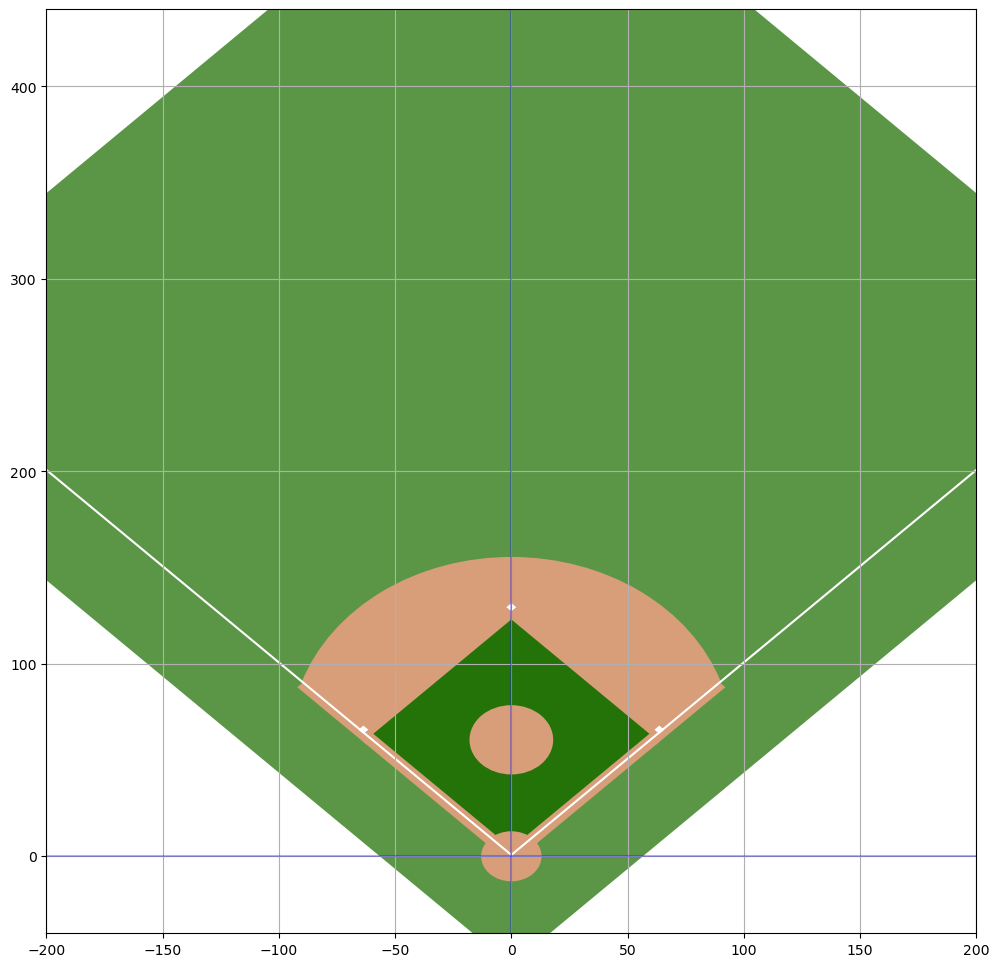

In [3]:
bf_1903_01 = Baseball_Field("1903_01_TeamNE_TeamA2")

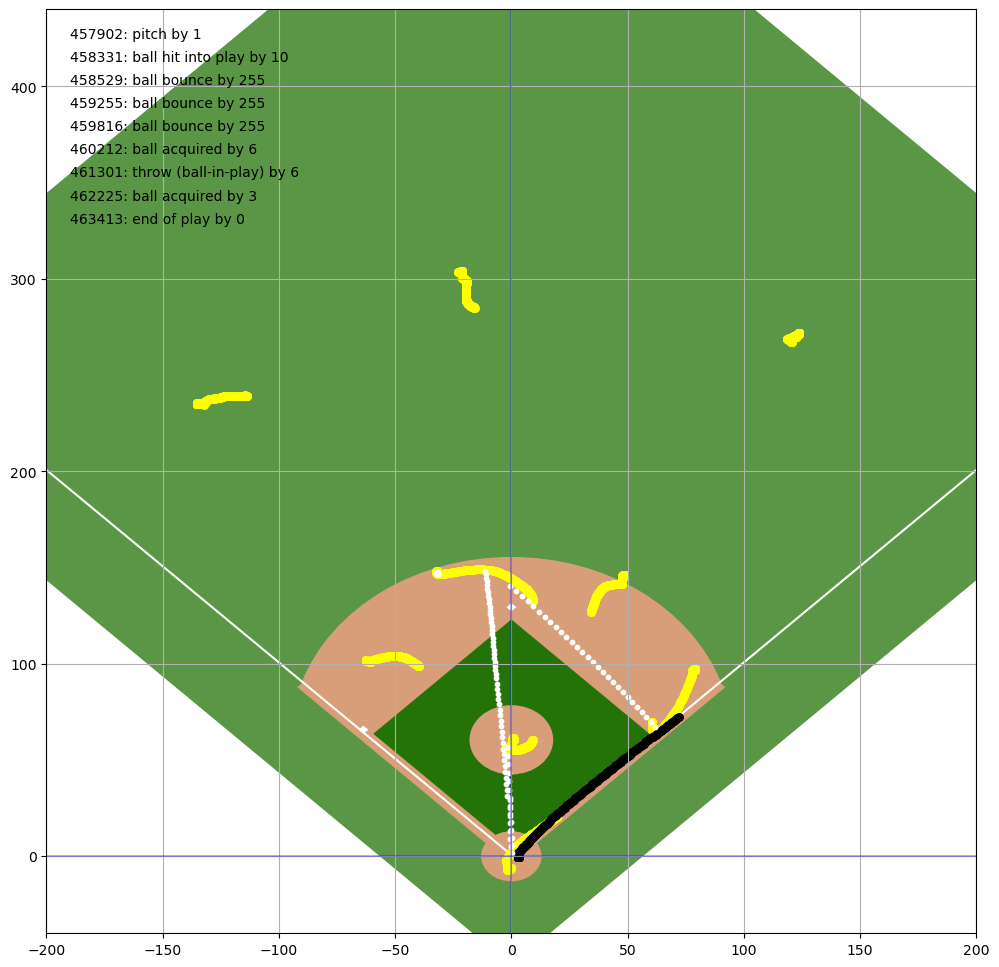

In [24]:
bf_1903_01.clear_plot()

play_id = 18

bf_1903_01.plot_all_components(play_id=play_id)
bf_1903_01.fig

# bf_1903_01.create_gif(play_id=play_id, tag="--debugging")

In [40]:
game_events_1903_01 = bf_1903_01.game_obj.game_events_df.copy()
game_info_1903_01 = bf_1903_01.game_obj.game_info_df.copy()
player_pos_1903_01 = bf_1903_01.game_obj.new_player_pos.copy()
ball_pos_1903_01 = bf_1903_01.game_obj.ball_pos_df.copy()



game_events_1903_01.head(5)

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts,prev_event_code,prev_event,prev_event_ts
1,1903_01_TeamNE_TeamA2,1,1,1,19199,1,1,pitch,2.0,ball acquired,19661.0,NaN,NaN,NaN
2,1903_01_TeamNE_TeamA2,1,1,1,19661,2,2,ball acquired,5.0,end of play,19661.0,1.0,pitch,19199.0
3,1903_01_TeamNE_TeamA2,1,1,1,19661,0,5,end of play,NaN,NaN,NaN,2.0,ball acquired,19661.0
4,1903_01_TeamNE_TeamA2,2,1,2,29858,1,1,pitch,2.0,ball acquired,30320.0,NaN,NaN,NaN
5,1903_01_TeamNE_TeamA2,2,1,2,30320,2,2,ball acquired,5.0,end of play,30320.0,1.0,pitch,29858.0


In [7]:
game_events_1903_01[game_events_1903_01["play_id"] == 326]

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts,prev_event_code,prev_event,prev_event_ts
1251,1903_01_TeamNE_TeamA2,326,84,327,10929703,1,1,pitch,4.0,ball hit into play,10930099.0,NaN,NaN,NaN
1252,1903_01_TeamNE_TeamA2,326,84,327,10930099,10,4,ball hit into play,16.0,ball bounce,10930363.0,1.0,pitch,10929703.0
1253,1903_01_TeamNE_TeamA2,326,84,327,10930363,255,16,ball bounce,16.0,ball bounce,10930990.0,4.0,ball hit into play,10930099.0
1254,1903_01_TeamNE_TeamA2,326,84,327,10930990,255,16,ball bounce,2.0,ball acquired,10931419.0,16.0,ball bounce,10930363.0
1255,1903_01_TeamNE_TeamA2,326,84,327,10931419,5,2,ball acquired,3.0,throw (ball-in-play),10932706.0,16.0,ball bounce,10930990.0
1256,1903_01_TeamNE_TeamA2,326,84,327,10932706,5,3,throw (ball-in-play),2.0,ball acquired,10933696.0,2.0,ball acquired,10931419.0
1257,1903_01_TeamNE_TeamA2,326,84,327,10933696,3,2,ball acquired,5.0,end of play,10934884.0,3.0,throw (ball-in-play),10932706.0
1258,1903_01_TeamNE_TeamA2,326,84,327,10934884,0,5,end of play,NaN,NaN,NaN,2.0,ball acquired,10933696.0


In [41]:
ball_pos_1903_01.loc[(ball_pos_1903_01["play_id"] == 326)
                       , :]

,game_str,play_id,timestamp,ball_position_x,ball_position_y,ball_position_z,smoothed_ball_position_x,smoothed_ball_position_y,smoothed_ball_position_z
14175,1903_01_TeamNE_TeamA2,326,10929703,2.694879,53.2071,5.72328,NaN,NaN,NaN
14176,1903_01_TeamNE_TeamA2,326,10929736,2.370363,48.6996,5.50053,2.376846,48.709200,5.493380
14177,1903_01_TeamNE_TeamA2,326,10929769,2.065296,44.2209,5.25633,2.227556,46.474650,5.367690
14178,1903_01_TeamNE_TeamA2,326,10929802,1.779684,39.7710,4.99062,1.932216,42.010350,5.112735
14179,1903_01_TeamNE_TeamA2,326,10929835,1.513521,35.3499,4.70346,1.656328,37.574925,4.836308
...,...,...,...,...,...,...,...,...,...
14254,1903_01_TeamNE_TeamA2,326,10933564,49.362600,71.1342,5.61570,47.812650,71.612175,5.771228
14255,1903_01_TeamNE_TeamA2,326,10933597,52.424700,70.1736,5.24322,50.884275,70.652850,5.414100
14256,1903_01_TeamNE_TeamA2,326,10933630,55.468200,69.2112,4.84002,53.937000,69.691425,5.026268
14257,1903_01_TeamNE_TeamA2,326,10933663,58.492500,68.2467,4.40613,56.970825,68.727825,4.607715


In [27]:
player_pos_1903_01.loc[(player_pos_1903_01["play_id"] == 18) &
                       (player_pos_1903_01["player_position"] == 6), :]

,game_str,play_id,timestamp,player_position,field_x,field_y,player_position_desc,lag_1_timestamp,lag_1_field_x,lag_1_field_y,diff_timestamp,diff_field_x,diff_field_y,velo_x,velo_y
27324,1903_01_TeamNE_TeamA2,18,457902,6,-31.8198,148.4139,SS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27325,1903_01_TeamNE_TeamA2,18,457935,6,-31.8234,148.3923,SS,457902.0,-31.8198,148.4139,33.0,-0.0036,-0.0216,-0.109091,-0.654545
27326,1903_01_TeamNE_TeamA2,18,457968,6,-31.8270,148.3710,SS,457935.0,-31.8234,148.3923,33.0,-0.0036,-0.0213,-0.109091,-0.645455
27327,1903_01_TeamNE_TeamA2,18,458001,6,-31.8312,148.3494,SS,457968.0,-31.8270,148.3710,33.0,-0.0042,-0.0216,-0.127273,-0.654545
27328,1903_01_TeamNE_TeamA2,18,458034,6,-31.8360,148.3278,SS,458001.0,-31.8312,148.3494,33.0,-0.0048,-0.0216,-0.145455,-0.654545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27578,1903_01_TeamNE_TeamA2,18,466284,6,9.2781,133.2093,SS,466251.0,9.2379,133.3806,33.0,0.0402,-0.1713,1.218182,-5.190909
27579,1903_01_TeamNE_TeamA2,18,466317,6,9.3174,133.0383,SS,466284.0,9.2781,133.2093,33.0,0.0393,-0.1710,1.190909,-5.181818
27580,1903_01_TeamNE_TeamA2,18,466350,6,9.3564,132.8673,SS,466317.0,9.3174,133.0383,33.0,0.0390,-0.1710,1.181818,-5.181818
27581,1903_01_TeamNE_TeamA2,18,466383,6,9.3951,132.6966,SS,466350.0,9.3564,132.8673,33.0,0.0387,-0.1707,1.172727,-5.172727


In [47]:
game_events_1903_01.loc[(game_events_1903_01["play_id"] == 326) &
                        (game_events_1903_01["event"].isin(["ball acquired", "throw (ball-in-play)"])), ]

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts,prev_event_code,prev_event,prev_event_ts
1255,1903_01_TeamNE_TeamA2,326,84,327,10931419,5,2,ball acquired,3.0,throw (ball-in-play),10932706.0,16.0,ball bounce,10930990.0
1256,1903_01_TeamNE_TeamA2,326,84,327,10932706,5,3,throw (ball-in-play),2.0,ball acquired,10933696.0,2.0,ball acquired,10931419.0
1257,1903_01_TeamNE_TeamA2,326,84,327,10933696,3,2,ball acquired,5.0,end of play,10934884.0,3.0,throw (ball-in-play),10932706.0


In [13]:
plt.close()

In [99]:
## stretch the ball pos to the player pos

# trust the ball pos at ball acquired

# trust which time scale? I think the ball probably


ball_acq = game_events_1903_01.loc[
    (game_events_1903_01["play_id"] == 326) &
    (game_events_1903_01["event"] == "ball acquired")
    , "timestamp"
].values[0]


this_play_ball = ball_pos_1903_01.loc[ball_pos_1903_01["play_id"] == play_id]
this_play_ball["this_play_ms"] = this_play_ball.timestamp - this_play_ball.timestamp.min()


first_ball_acq_x = ball_pos_1903_01.loc[ball_pos_1903_01["timestamp"] == ball_acq, "ball_position_x"]


this_play_players = player_pos_1903_01.loc[
    (player_pos_1903_01["play_id"] == play_id) &
    (player_pos_1903_01["player_position"] == 5)
    , :]

this_play_players["this_play_ms"] = this_play_players.timestamp - this_play_players.timestamp.min()


overlap_ms_players = this_play_players.loc[
    (abs(this_play_players["field_x"] - first_ball_acq_x.values[0]) < 0.05)
    , "this_play_ms"].values[0]


overlap_ms_ball = this_play_ball.loc[this_play_ball["timestamp"] == ball_acq, "this_play_ms"].values[0]


time_delta = overlap_ms_players - overlap_ms_ball

In [100]:
time_delta

3102

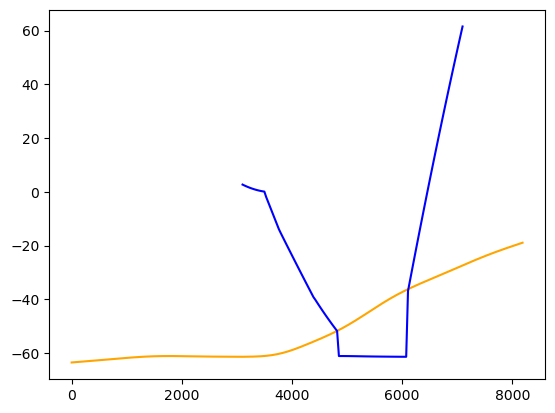

In [103]:
f, ax = plt.subplots()



ax.plot(this_play_players["this_play_ms"], this_play_players["field_x"], color = "orange") 
ax.plot(this_play_ball["this_play_ms"]+time_delta, this_play_ball["ball_position_x"], color = "blue") 


In [85]:
overlap_ms_ball

1716

In [77]:
this_play_ball

,game_str,play_id,timestamp,ball_position_x,ball_position_y,ball_position_z,smoothed_ball_position_x,smoothed_ball_position_y,smoothed_ball_position_z,this_play_ms
14175,1903_01_TeamNE_TeamA2,326,10929703,2.694879,53.2071,5.72328,NaN,NaN,NaN,0
14176,1903_01_TeamNE_TeamA2,326,10929736,2.370363,48.6996,5.50053,2.376846,48.709200,5.493380,33
14177,1903_01_TeamNE_TeamA2,326,10929769,2.065296,44.2209,5.25633,2.227556,46.474650,5.367690,66
14178,1903_01_TeamNE_TeamA2,326,10929802,1.779684,39.7710,4.99062,1.932216,42.010350,5.112735,99
14179,1903_01_TeamNE_TeamA2,326,10929835,1.513521,35.3499,4.70346,1.656328,37.574925,4.836308,132
...,...,...,...,...,...,...,...,...,...,...
14254,1903_01_TeamNE_TeamA2,326,10933564,49.362600,71.1342,5.61570,47.812650,71.612175,5.771228,3861
14255,1903_01_TeamNE_TeamA2,326,10933597,52.424700,70.1736,5.24322,50.884275,70.652850,5.414100,3894
14256,1903_01_TeamNE_TeamA2,326,10933630,55.468200,69.2112,4.84002,53.937000,69.691425,5.026268,3927
14257,1903_01_TeamNE_TeamA2,326,10933663,58.492500,68.2467,4.40613,56.970825,68.727825,4.607715,3960


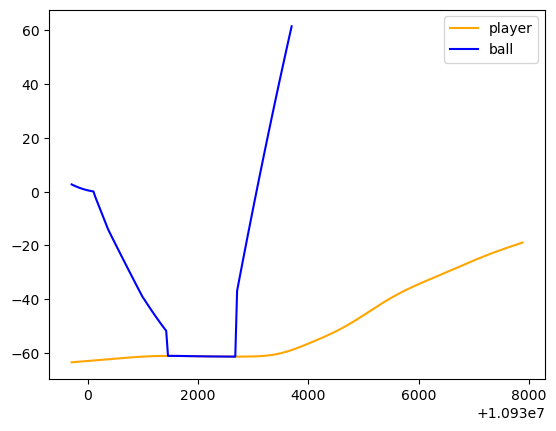

In [97]:
f, ax = plt.subplots()

play_id = 326

thirdbaseman_df = player_pos_1903_01.loc[(player_pos_1903_01["play_id"] == play_id) &
                       (player_pos_1903_01["player_position"] == 5), :]


ball_df = ball_pos_1903_01.loc[(ball_pos_1903_01["play_id"] == play_id)
                       , :]

ax.plot(thirdbaseman_df["timestamp"], thirdbaseman_df["field_x"], color = "orange", label="player") 
ax.plot(ball_df["timestamp"], ball_df["ball_position_x"], color = "blue", label="ball") 
ax.legend()


In [44]:
ball_df

,game_str,play_id,timestamp,ball_position_x,ball_position_y,ball_position_z,smoothed_ball_position_x,smoothed_ball_position_y,smoothed_ball_position_z
400,1903_01_TeamNE_TeamA2,18,457902,-1.602261,56.9277,6.504990,NaN,NaN,NaN
401,1903_01_TeamNE_TeamA2,18,457935,-1.456113,52.3356,6.345930,-1.455719,52.355200,6.339780
402,1903_01_TeamNE_TeamA2,18,457968,-1.308783,47.8023,6.168420,-1.381857,50.098350,6.247943
403,1903_01_TeamNE_TeamA2,18,458001,-1.160271,43.3278,5.972430,-1.233936,45.594375,6.061185
404,1903_01_TeamNE_TeamA2,18,458034,-1.010577,38.9118,5.757960,-1.084833,41.149050,5.855962
...,...,...,...,...,...,...,...,...,...
495,1903_01_TeamNE_TeamA2,18,462093,54.034800,77.4219,3.839280,53.011275,78.707475,4.018830
496,1903_01_TeamNE_TeamA2,18,462126,56.038200,74.8623,3.419610,55.025625,76.145025,3.614293
497,1903_01_TeamNE_TeamA2,18,462159,58.020000,72.3087,2.969601,57.018300,73.588425,3.179448
498,1903_01_TeamNE_TeamA2,18,462192,59.980200,69.7608,2.489301,58.989300,71.037600,2.714301


In [52]:
thirdbaseman_df

,game_str,play_id,timestamp,player_position,field_x,field_y,player_position_desc,lag_1_timestamp,lag_1_field_x,lag_1_field_y,diff_timestamp,diff_field_x,diff_field_y,velo_x,velo_y
624323,1903_01_TeamNE_TeamA2,326,10929703,5,-63.4665,93.2103,3B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
624324,1903_01_TeamNE_TeamA2,326,10929736,5,-63.4131,93.1335,3B,10929703.0,-63.4665,93.2103,33.0,0.0534,-0.0768,1.618182,-2.327273
624325,1903_01_TeamNE_TeamA2,326,10929769,5,-63.3594,93.0567,3B,10929736.0,-63.4131,93.1335,33.0,0.0537,-0.0768,1.627273,-2.327273
624326,1903_01_TeamNE_TeamA2,326,10929802,5,-63.3057,92.9796,3B,10929769.0,-63.3594,93.0567,33.0,0.0537,-0.0771,1.627273,-2.336364
624327,1903_01_TeamNE_TeamA2,326,10929835,5,-63.2517,92.9028,3B,10929802.0,-63.3057,92.9796,33.0,0.0540,-0.0768,1.636364,-2.327273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624567,1903_01_TeamNE_TeamA2,326,10937755,5,-19.8285,94.0227,3B,10937722.0,-20.0559,93.9519,33.0,0.2274,0.0708,6.890909,2.145455
624568,1903_01_TeamNE_TeamA2,326,10937788,5,-19.6017,94.0938,3B,10937755.0,-19.8285,94.0227,33.0,0.2268,0.0711,6.872727,2.154545
624569,1903_01_TeamNE_TeamA2,326,10937821,5,-19.3758,94.1652,3B,10937788.0,-19.6017,94.0938,33.0,0.2259,0.0714,6.845455,2.163636
624570,1903_01_TeamNE_TeamA2,326,10937854,5,-19.1499,94.2369,3B,10937821.0,-19.3758,94.1652,33.0,0.2259,0.0717,6.845455,2.172727


## See a play that works, before I go messing with things

1903_23_TeamNA_TeamA1_play148--steal, not picked

In [105]:
bf_23 = Baseball_Field("1903_23_TeamNA_TeamA1")

In [106]:
game_events_23 = bf_23.game_obj.game_events_df.copy()
game_info_23 = bf_23.game_obj.game_info_df.copy()
player_pos_23 = bf_23.game_obj.new_player_pos.copy()
ball_pos_23 = bf_23.game_obj.ball_pos_df.copy()

game_events_23.head(5)

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts,prev_event_code,prev_event,prev_event_ts
1,1903_23_TeamNA_TeamA1,1,1,1,19510,1,1,pitch,2.0,ball acquired,19960.0,NaN,NaN,NaN
2,1903_23_TeamNA_TeamA1,1,1,1,19960,2,2,ball acquired,5.0,end of play,19960.0,1.0,pitch,19510.0
3,1903_23_TeamNA_TeamA1,1,1,1,19960,0,5,end of play,NaN,NaN,NaN,2.0,ball acquired,19960.0
4,1903_23_TeamNA_TeamA1,2,1,2,33410,1,1,pitch,4.0,ball hit into play,33810.0,NaN,NaN,NaN
5,1903_23_TeamNA_TeamA1,2,1,2,33810,10,4,ball hit into play,5.0,end of play,33910.0,1.0,pitch,33410.0


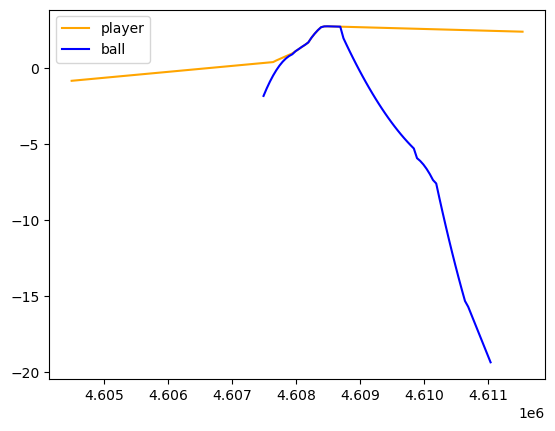

In [116]:
bf_23.clear_plot()
plt.close()

f, ax = plt.subplots()

play_id = 148

thirdbaseman_df = player_pos_23.loc[(player_pos_23["play_id"] == play_id) &
                       (player_pos_23["player_position"] == 2), :]


ball_df = ball_pos_23.loc[(ball_pos_23["play_id"] == play_id)
                       , :]

ax.plot(thirdbaseman_df["timestamp"], thirdbaseman_df["field_x"], color = "orange", label="player") 
ax.plot(ball_df["timestamp"], ball_df["ball_position_x"], color = "blue", label="ball") 
ax.legend()

f

In [111]:
plt.close()